- references
    - https://www.youtube.com/watch?v=kYWHfgkRc9s
    - https://rh8liuqy.github.io/Accept_reject.html

In [48]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

## basics

- 也叫 accept/reject algorithm
    - 一种采样 sampling method

## examples

### $f(x)=1.2-x^4$

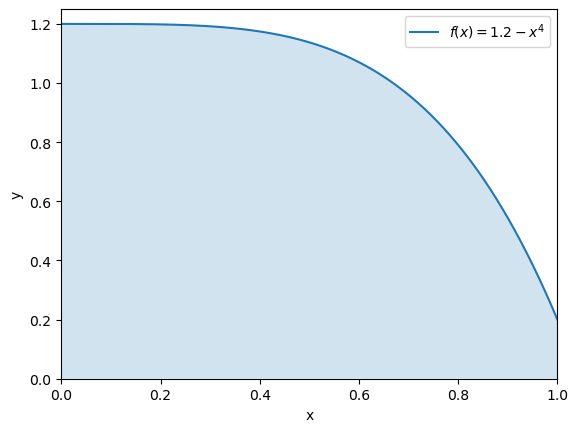

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1.2 - x**4

xs = np.linspace(0, 1, 1000)
ys = f(xs)

plt.plot(xs, ys, label="$f(x)=1.2-x^4$") 
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0, 1.25)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

#### sample1

In [10]:
def sample(f, xmin=0, xmax=1, ymax=1.2):
    while True:
        x = np.random.uniform(low=xmin, high=xmax)
        y = np.random.uniform(low=0, high=ymax)
        if y < f(x):
            return x

In [16]:
samples = [sample(f, ) for _ in range(100000)]

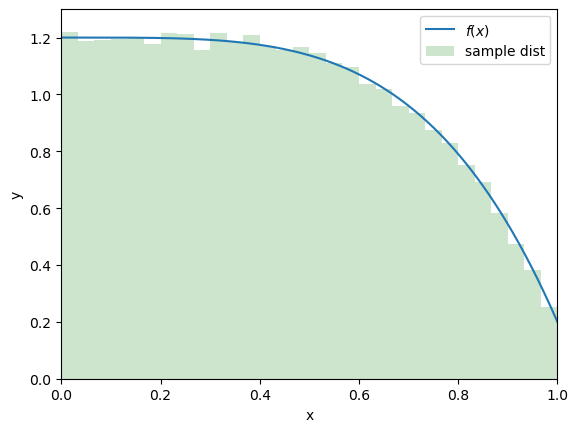

In [19]:
plt.plot(xs, ys, label='$f(x)$')
plt.hist(samples, density=True, alpha=.2, label='sample dist', color='green', bins=30)
plt.xlim(0, 1)
plt.ylim(0, 1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#### batch sample

In [20]:
def batch_sample(f, num_samples, xmin=0, xmax=1., ymax=1.2, batch_size=1000):
    sampels = []
    while len(samples) < num_samples:
        xs = np.random.uniform(low=xmin, high=xmax, size=batch_size)
        ys = np.random.uniform(low=0, high=ymax, size=batch_size)
        sampels.extend(xs[ys < f(xs)].tolist())
    return samples[:num_samples]

In [23]:
samples = batch_sample(f, num_samples=10000)

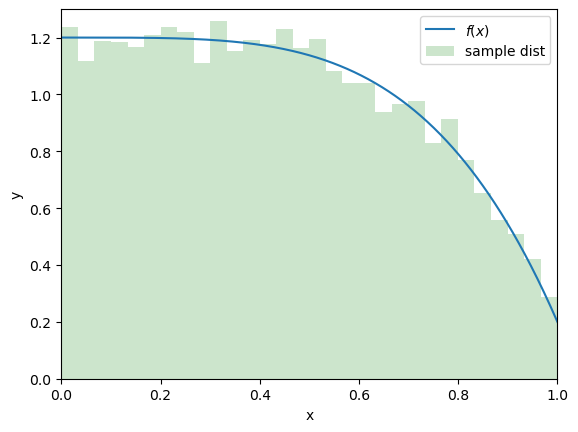

In [24]:
plt.plot(xs, ys, label='$f(x)$')
plt.hist(samples, density=True, alpha=.2, label='sample dist', color='green', bins=30)
plt.xlim(0, 1)
plt.ylim(0, 1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [27]:
%timeit [sample(f) for i in range(10000)]

48.9 ms ± 7.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit batch_sample(f, 10000)

18.4 µs ± 78.1 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## sample efficiency

$$
f(x)=e^{-\pi x^2}
$$

In [30]:
gauss = lambda x: np.exp(-np.pi*x**2)

(Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)'))

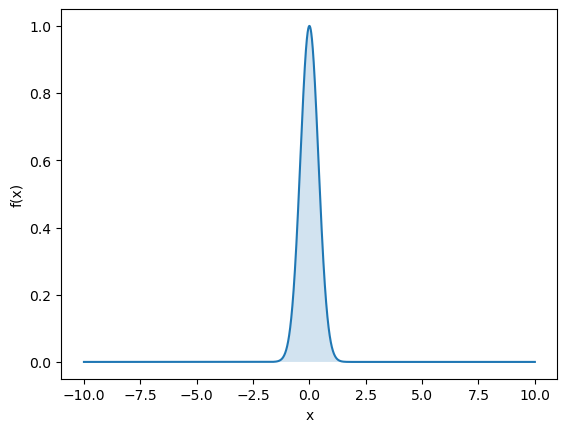

In [31]:
xs = np.linspace(-10, 10, 10000)
ys = gauss(xs)
plt.plot(xs, ys)
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.xlabel("x"), plt.ylabel("f(x)")

In [32]:
def batch_sample(f, num_samples, xmin=-10, xmax=10, ymax=1):
    x = np.random.uniform(low=xmin, high=xmax, size=num_samples)
    y = np.random.uniform(low=0, high=ymax, size=num_samples)
    passed = (y < f(x)).astype(int)
    return x, y, passed

In [50]:
sample_xs, sample_ys, passed = batch_sample(gauss, 10000)

In [52]:
sum(passed)/10000

0.0511

Text(0.5, 1.0, 'rej sampling efficiency: 5.11%')

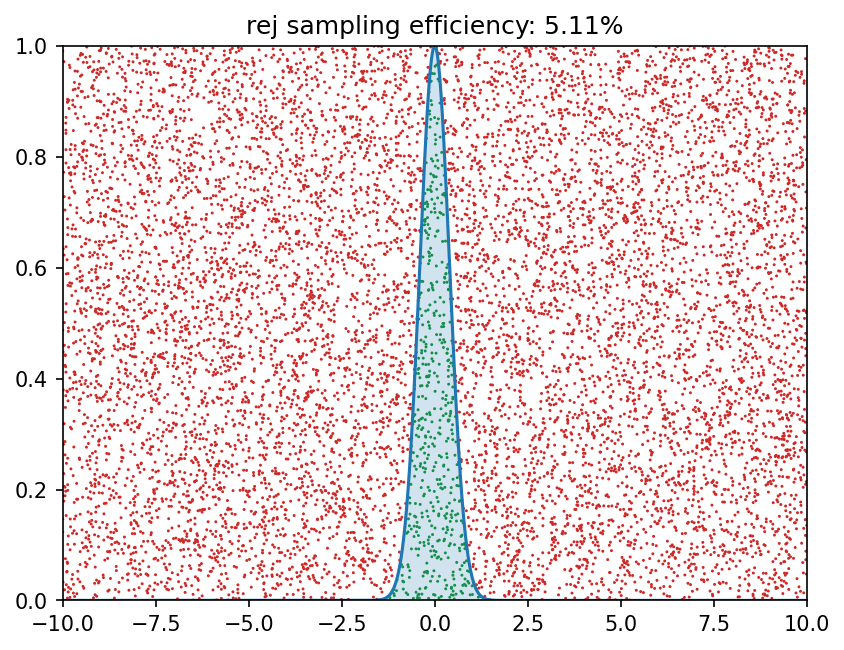

In [54]:
plt.plot(xs, ys)
plt.fill_between(xs, ys, alpha=0.2)
plt.scatter(sample_xs, sample_ys, c=passed, cmap='RdYlGn', vmin=-0.1, vmax=1.1, lw=0, s=2)
plt.xlim(-10, 10)
plt.ylim(0, 1)
plt.title(f'rej sampling efficiency: {sum(passed)/10000:.2%}')